In [8]:
import pandas as pd
x_data=pd.read_csv('0_x.csv',header=None)
y_data=pd.read_csv('0_y.csv',header=None)

Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.

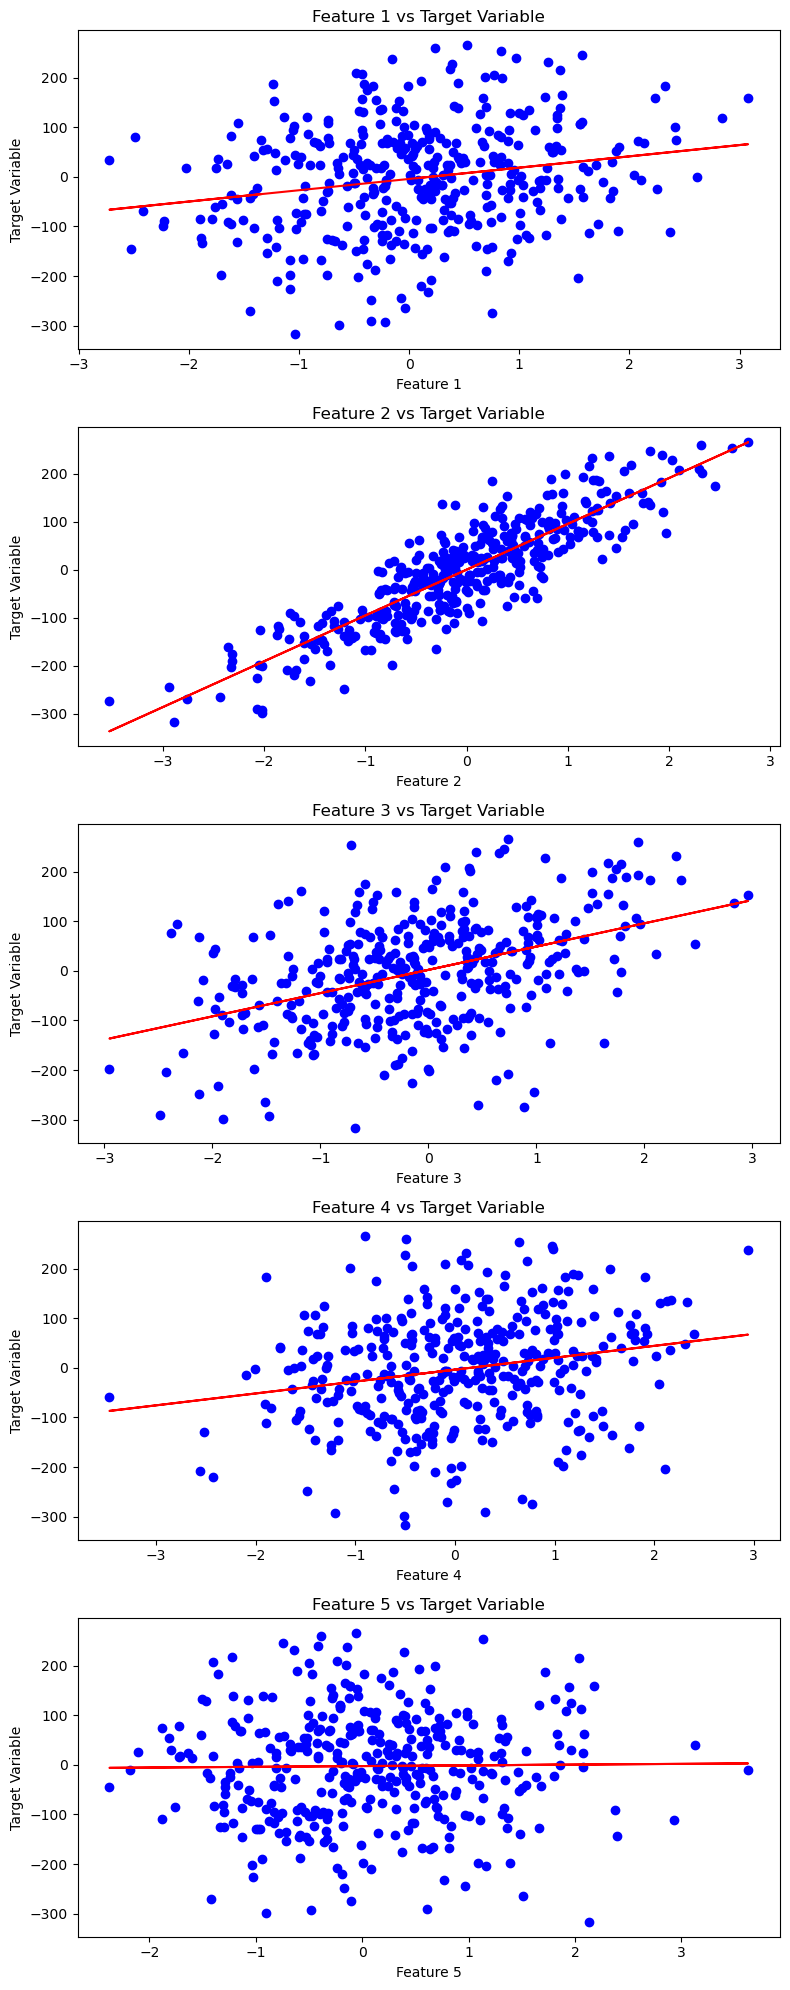

In [9]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()
num_features = x_data.shape[1]
fig, axes = plt.subplots(nrows=num_features, figsize=(8, 4 * num_features))
for i in range(num_features):
    x_feature = x_data.iloc[:, i].values.reshape(-1, 1)
    model.fit(x_feature, y_data)
    y_pred = model.predict(x_feature)
    axes[i].scatter(x_feature, y_data, color='blue')
    axes[i].plot(x_feature, y_pred, color='red')
    axes[i].set_title(f'Feature {i+1} vs Target Variable')
    axes[i].set_xlabel(f'Feature {i+1}')
    axes[i].set_ylabel('Target Variable')

plt.tight_layout()
plt.show()


(*) Модифицируйте код из предыдущей работы так, чтобы модель регрессии умела работать с входными данными, состоящими из произвольного количества столбцов.

In [18]:
class MultipleLinearRegressionModel(object):
    def __init__(self, n_features):
        self.coefficients = np.zeros(n_features + 1)

    def predict(self, X):
        X_with_intercept = np.hstack([np.ones((X.shape[0], 1)), X])
        return np.dot(X_with_intercept, self.coefficients)

    def error(self, X, Y):
        predictions = self.predict(X)
        if isinstance(Y, pd.DataFrame):
            Y = Y.values
        return np.sum((predictions - Y.flatten()) ** 2) / (2 * len(X))

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        X_with_intercept = np.hstack([np.ones((X.shape[0], 1)), X])

        while step < max_steps:
            predictions = self.predict(X)
            error = self.error(X, Y)
            gradient = np.dot(X_with_intercept.T, (predictions - Y.flatten())) / len(Y)
            self.coefficients -= alpha * gradient
            
            steps.append(step)
            errors.append(error)
            if len(errors) > 1 and np.abs(errors[-2] - errors[-1]) < accuracy:
                break

            step += 1

        return steps, errors

model = MultipleLinearRegressionModel(5)
model.fit(x_data,y_data.to_numpy())


52.054090756267634

Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

def fit_and_evaluate_poly_regression(X, Y, degree):
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    poly_model = LinearRegression()
    poly_model.fit(X_poly, Y)

    Y_pred = poly_model.predict(X_poly)

    mse = mean_squared_error(Y, Y_pred)
    r2 = r2_score(Y, Y_pred)

    return Y_pred, mse, r2

results = {}
for i in range(num_features):
    feature_results = {}
    X_feature = x_data.iloc[:, [i]]

    for degree in [2, 3, 10]:
        Y_pred, mse, r2 = fit_and_evaluate_poly_regression(X_feature, y_data, degree)
        feature_results[f'Degree {degree}'] = {'MSE': mse, 'R2': r2}

    results[f'Feature {i+1}'] = feature_results

results


{'Feature 1': {'Degree 2': {'MSE': 11491.9092554928,
   'R2': 0.04367170367915507},
  'Degree 3': {'MSE': 11490.787322521215, 'R2': 0.04376506816920167},
  'Degree 10': {'MSE': 11411.586520357572, 'R2': 0.05035596325168745}},
 'Feature 2': {'Degree 2': {'MSE': 2763.909752818907,
   'R2': 0.7699942588883133},
  'Degree 3': {'MSE': 2750.4011562130727, 'R2': 0.7711184109235},
  'Degree 10': {'MSE': 2731.6728927216436, 'R2': 0.7726769307411923}},
 'Feature 3': {'Degree 2': {'MSE': 9733.43156260478,
   'R2': 0.19000787278473819},
  'Degree 3': {'MSE': 9699.859734879616, 'R2': 0.19280163734543865},
  'Degree 10': {'MSE': 9560.372197205497, 'R2': 0.20440944561264385}},
 'Feature 4': {'Degree 2': {'MSE': 11440.588266310799,
   'R2': 0.04794250960519941},
  'Degree 3': {'MSE': 11412.119233523757, 'R2': 0.05031163217811918},
  'Degree 10': {'MSE': 11143.475913108015, 'R2': 0.07266746559268988}},
 'Feature 5': {'Degree 2': {'MSE': 12004.093015747168,
   'R2': 0.0010490365524417067},
  'Degree 3':

Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.

In [21]:
data_for_df = []
for feature, degrees in results.items():
    for degree, metrics in degrees.items():
        data_for_df.append({
            'Feature': feature,
            'Degree': degree,
            'MSE': metrics['MSE'],
            'R2': metrics['R2']
        })

summary_df = pd.DataFrame(data_for_df)
summary_df.sort_values(by=['Feature', 'Degree'])


,Feature,Degree,MSE,R2
2,Feature 1,Degree 10,11411.586520,0.050356
0,Feature 1,Degree 2,11491.909255,0.043672
1,Feature 1,Degree 3,11490.787323,0.043765
5,Feature 2,Degree 10,2731.672893,0.772677
3,Feature 2,Degree 2,2763.909753,0.769994
4,Feature 2,Degree 3,2750.401156,0.771118
8,Feature 3,Degree 10,9560.372197,0.204409
6,Feature 3,Degree 2,9733.431563,0.190008
7,Feature 3,Degree 3,9699.859735,0.192802
11,Feature 4,Degree 10,11143.475913,0.072667


Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

In [23]:
from sklearn.metrics import mean_absolute_error, median_absolute_error

def fit_and_evaluate_poly_regression_extended(X, Y, degree):

    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    
    poly_model = LinearRegression()
    poly_model.fit(X_poly, Y)

    
    Y_pred = poly_model.predict(X_poly)

    mse = mean_squared_error(Y, Y_pred)
    mae = mean_absolute_error(Y, Y_pred)
    medae = median_absolute_error(Y, Y_pred)
    r2 = r2_score(Y, Y_pred)

    return Y_pred, mse, mae, medae, r2
extended_results = {}
for i in range(num_features):
    feature_results = {}
    X_feature = x_data.iloc[:, [i]]

    for degree in [2, 3, 10]:
        Y_pred, mse, mae, medae, r2 = fit_and_evaluate_poly_regression_extended(X_feature, y_data, degree)
        feature_results[f'Degree {degree}'] = {'MSE': mse, 'MAE': mae, 'MedAE': medae, 'R2': r2}

    extended_results[f'Feature {i+1}'] = feature_results

extended_results


{'Feature 1': {'Degree 2': {'MSE': 11491.9092554928,
   'MAE': 85.77898803975982,
   'MedAE': 72.65307417386936,
   'R2': 0.04367170367915507},
  'Degree 3': {'MSE': 11490.787322521215,
   'MAE': 85.68440398798032,
   'MedAE': 72.94820039576335,
   'R2': 0.04376506816920167},
  'Degree 10': {'MSE': 11411.586520357572,
   'MAE': 84.85422356454063,
   'MedAE': 72.96877046297816,
   'R2': 0.05035596325168745}},
 'Feature 2': {'Degree 2': {'MSE': 2763.909752818907,
   'MAE': 42.13230334691435,
   'MedAE': 36.38341756517225,
   'R2': 0.7699942588883133},
  'Degree 3': {'MSE': 2750.4011562130727,
   'MAE': 42.061247779273764,
   'MedAE': 36.01280830843289,
   'R2': 0.7711184109235},
  'Degree 10': {'MSE': 2731.6728927216436,
   'MAE': 41.690870759277,
   'MedAE': 37.008199748162866,
   'R2': 0.7726769307411923}},
 'Feature 3': {'Degree 2': {'MSE': 9733.43156260478,
   'MAE': 77.45841528626207,
   'MedAE': 64.47927504255858,
   'R2': 0.19000787278473819},
  'Degree 3': {'MSE': 9699.8597348796

(*) Замерьте время обучения полиномиальных моделей с разной степенью полинома. Сделайте вывод.

In [24]:
import time

def fit_poly_regression_and_measure_time(X, Y, degree):
    start_time = time.time()

    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    poly_model = LinearRegression()
    poly_model.fit(X_poly, Y)

    end_time = time.time()
    training_time = end_time - start_time

    return training_time

training_times = {}

for i in range(num_features):
    feature_times = {}
    X_feature = x_data.iloc[:, [i]]  # Selecting each feature separately

    for degree in [2, 3, 10]:
        time_taken = fit_poly_regression_and_measure_time(X_feature, y_data, degree)
        feature_times[f'Degree {degree}'] = time_taken

    training_times[f'Feature {i+1}'] = feature_times

training_times


{'Feature 1': {'Degree 2': 0.003000497817993164,
  'Degree 3': 0.002511739730834961,
  'Degree 10': 0.001998424530029297},
 'Feature 2': {'Degree 2': 0.0049991607666015625,
  'Degree 3': 0.005233287811279297,
  'Degree 10': 0.0019989013671875},
 'Feature 3': {'Degree 2': 0.002000093460083008,
  'Degree 3': 0.0010006427764892578,
  'Degree 10': 0.002507925033569336},
 'Feature 4': {'Degree 2': 0.002002716064453125,
  'Degree 3': 0.0010001659393310547,
  'Degree 10': 0.0020020008087158203},
 'Feature 5': {'Degree 2': 0.002000093460083008,
  'Degree 3': 0.0015034675598144531,
  'Degree 10': 0.002009153366088867}}